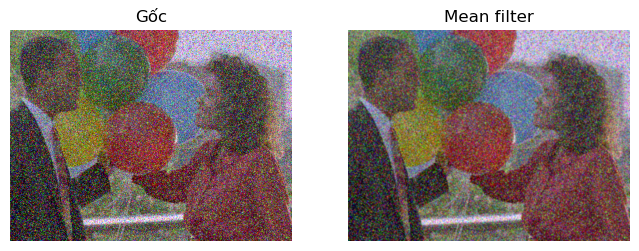

In [11]:
import numpy as np
import imageio.v2 as iio
import os
from glob import glob
from scipy.ndimage import uniform_filter
import matplotlib.pyplot as plt

# Đường dẫn tới thư mục chứa ảnh
folder = './exercise'  # Đổi lại nếu cần

# Lấy danh sách các file ảnh (jpg, png)
image_files = glob(os.path.join(folder, '*.jpg')) + glob(os.path.join(folder, '*.png'))

# Tạo thư mục lưu kết quả nếu chưa có
output_folder = './exercise_mean'
os.makedirs(output_folder, exist_ok=True)

# Chỉ lấy tối đa 3 ảnh đầu tiên
for file in image_files[:3]:
    img = iio.imread(file)
    # Nếu ảnh màu, áp dụng mean filter cho từng kênh
    if img.ndim == 3:
        filtered = np.zeros_like(img)
        for c in range(3):
            filtered[..., c] = uniform_filter(img[..., c], size=3)
    else:
        filtered = uniform_filter(img, size=3)
    # Lưu ảnh đã lọc
    out_path = os.path.join(output_folder, os.path.basename(file))
    iio.imwrite(out_path, filtered)

    # Hiển thị ảnh gốc và ảnh đã lọc
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].imshow(img, cmap='gray' if img.ndim==2 else None)
    axs[0].set_title('Gốc')
    axs[0].axis('off')
    axs[1].imshow(filtered, cmap='gray' if img.ndim==2 else None)
    axs[1].set_title('Mean filter')
    axs[1].axis('off')
    plt.show()